In [15]:
%matplotlib notebook
import scimple as scm
import numpy as np
import pandas as pd
adult = scm.get_sample('adults')
#{0: 'age', 1: 'work class', 2: 'fnlwgt', 3: 'education', 4: 'education-num', 5: 'marital-status', 6: 'occupation', 7: 'relationship', 8: 'race', 9: 'sex', 10: 'capital-gain', 11: 'capital-loss', 12: 'hours-per-week', 13: 'native-country', 14: 'salary'}
df = spark.createDataFrame(adult[1:], list(adult[0]))

In [16]:
rdd = df.rdd
rdd.collect()

[Row(age=50, work class='Self-emp-not-inc', fnlwgt=83311, education='Bachelors', education-num=13, marital-status='Married-civ-spouse', occupation='Exec-managerial', relationship='Husband', race='White', sex='Male', capital-gain=0, capital-loss=0, hours-per-week=13, native-country='United-States', salary='<=50K'),
 Row(age=38, work class='Private', fnlwgt=215646, education='HS-grad', education-num=9, marital-status='Divorced', occupation='Handlers-cleaners', relationship='Not-in-family', race='White', sex='Male', capital-gain=0, capital-loss=0, hours-per-week=40, native-country='United-States', salary='<=50K'),
 Row(age=53, work class='Private', fnlwgt=234721, education='11th', education-num=7, marital-status='Married-civ-spouse', occupation='Handlers-cleaners', relationship='Husband', race='Black', sex='Male', capital-gain=0, capital-loss=0, hours-per-week=40, native-country='United-States', salary='<=50K'),
 Row(age=28, work class='Private', fnlwgt=338409, education='Bachelors', educ

In [17]:
df.show()

+---+----------------+------+------------+-------------+--------------------+-----------------+-------------+------------------+------+------------+------------+--------------+--------------+------+
|age|      work class|fnlwgt|   education|education-num|      marital-status|       occupation| relationship|              race|   sex|capital-gain|capital-loss|hours-per-week|native-country|salary|
+---+----------------+------+------------+-------------+--------------------+-----------------+-------------+------------------+------+------------+------------+--------------+--------------+------+
| 50|Self-emp-not-inc| 83311|   Bachelors|           13|  Married-civ-spouse|  Exec-managerial|      Husband|             White|  Male|           0|           0|            13| United-States| <=50K|
| 38|         Private|215646|     HS-grad|            9|            Divorced|Handlers-cleaners|Not-in-family|             White|  Male|           0|           0|            40| United-States| <=50K|
| 53|

In [18]:
#res = df.rdd.map(lambda line:(line['age'], [1, line['hours-per-week']])).reduceByKey(lambda h1, h2: [h1[0]+h2[0],h1[1]+h2[1]]).collect()
res_m = df[df['sex'] == 'Male'].rdd.map(lambda line:(line['age'], [1, line['hours-per-week']])).reduceByKey(lambda h1, h2: [h1[0]+h2[0],h1[1]+h2[1]]).collect()
res_f = df[df['sex'] == 'Female'].rdd.map(lambda line:(line['age'], [1, line['hours-per-week']])).reduceByKey(lambda h1, h2: [h1[0]+h2[0],h1[1]+h2[1]]).collect()


In [19]:
res_m = [scm.flatten_n_times(1,elem) for elem in res_m]
res_f = [scm.flatten_n_times(1,elem) for elem in res_f]
res_m

[[52, 344, 15364],
 [32, 573, 25554],
 [40, 531, 23586],
 [56, 260, 11238],
 [20, 390, 13753],
 [48, 372, 16820],
 [24, 493, 19962],
 [36, 611, 27923],
 [76, 30, 699],
 [44, 522, 23926],
 [64, 138, 5088],
 [28, 557, 24220],
 [60, 233, 9760],
 [80, 17, 418],
 [72, 42, 1162],
 [68, 78, 2573],
 [88, 2, 80],
 [84, 6, 166],
 [53, 328, 14674],
 [37, 629, 28680],
 [25, 528, 21940],
 [49, 406, 18406],
 [45, 512, 22994],
 [21, 391, 14193],
 [57, 267, 11690],
 [41, 575, 25595],
 [29, 542, 23718],
 [33, 620, 27447],
 [61, 221, 8639],
 [17, 209, 4731],
 [65, 121, 4381],
 [77, 20, 513],
 [73, 42, 1259],
 [81, 11, 298],
 [69, 75, 2370],
 [85, 2, 38],
 [50, 446, 20265],
 [38, 591, 27285],
 [42, 552, 24766],
 [30, 588, 25841],
 [34, 629, 28258],
 [54, 310, 13689],
 [22, 423, 15668],
 [46, 509, 22540],
 [18, 282, 7533],
 [70, 61, 1983],
 [58, 261, 11049],
 [90, 29, 1142],
 [66, 102, 3476],
 [26, 495, 21071],
 [62, 170, 6872],
 [74, 32, 851],
 [78, 16, 449],
 [82, 10, 183],
 [35, 630, 28653],
 [43, 541,

<IPython.core.display.Javascript object>


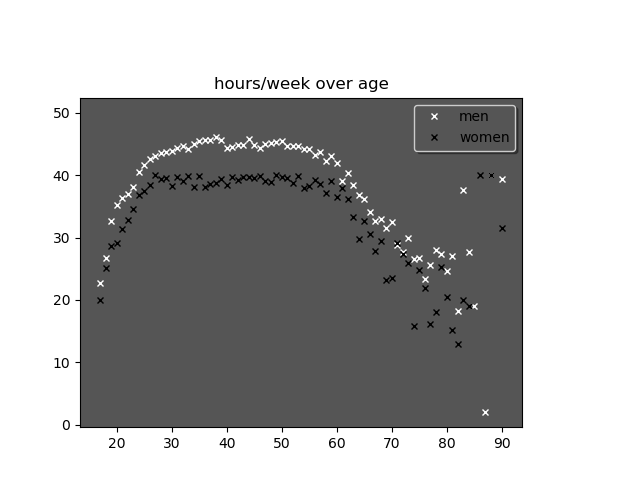

In [20]:
scm.Plot(2, bg_color='#555555', title="hours/week over age")\
.add(res_m, 0, lambda i, y:res_m[i][2]/res_m[i][1], marker='x', markersize=4, colored_by='#ffffff', label='men')\
.add(res_f, 0, lambda i, y:res_f[i][2]/res_f[i][1], marker='x', markersize=4, colored_by='#000000', label='women')


In [21]:
#res = df.rdd.map(lambda line:(line['age'], [1, line['hours-per-week']])).reduceByKey(lambda h1, h2: [h1[0]+h2[0],h1[1]+h2[1]]).collect()
res_um = df[df['native-country'] == 'United-States'][df['sex'] == 'Male']
res_um_count = res_um.count()
res_um = res_um.rdd.map(lambda line:(line['salary'], 1)).reduceByKey(lambda n1,n2: n1+n2).collect()

res_ff = df[df['native-country'] == 'France'][df['sex'] == 'Female']
res_ff_count = res_ff.count()
res_ff = res_ff.rdd.map(lambda line:(line['salary'], 1)).reduceByKey(lambda n1,n2: n1+n2).collect()

res_uf = df[df['native-country'] == 'United-States'][df['sex'] == 'Female']
res_uf_count = res_uf.count()
res_uf = res_uf.rdd.map(lambda line:(line['salary'], 1)).reduceByKey(lambda n1,n2: n1+n2).collect()

res_fm = df[df['native-country'] == 'France'][df['sex'] == 'Male']
res_fm_count = res_fm.count()
res_fm = res_fm.rdd.map(lambda line:(line['salary'], 1)).reduceByKey(lambda n1,n2: n1+n2).collect()
res_fm

[('>50K', 9), ('<=50K', 8)]

In [22]:
labels = [elem[0] for elem in res_ff]
labels

['>50K', '<=50K']

In [23]:
print(len(scm.flatten_n_times(1, [[salary]*len(np.arange(0,0.4,0.01)) for salary in labels])))
print(len(scm.flatten_n_times(1, len(labels)*[np.arange(0,0.4,0.01)])))
scm.flatten_n_times(1, len(labels)*[np.arange(0,0.4,0.01)])

80
80


[0.0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35000000000000003,
 0.36,
 0.37,
 0.38,
 0.39,
 0.0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35000000000000003,
 0.36,
 0.37,
 0.38,
 0.39]

<IPython.core.display.Javascript object>


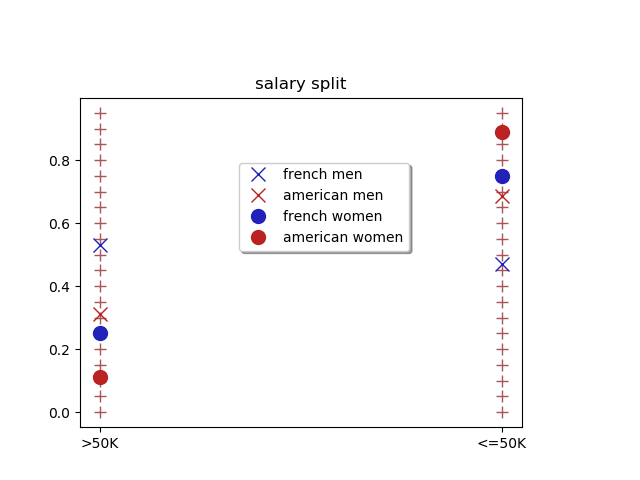

In [24]:
scm.Plot(2, bg_color='#ffffff', title="salary split")\
.add(x=scm.flatten_n_times(1, [[educ]*len(np.arange(0,1,0.05)) for educ in labels]),
    y=scm.flatten_n_times(1, len(labels)*[np.arange(0,1,0.05)]), marker='+', colored_by='#aa5555')\
.add(res_fm, 0, [res_fm[i][1]/res_fm_count for i in range(len(res_fm))], marker='x', markersize=10, colored_by='#2222bb', label='french men')\
.add(res_um, 0, [res_um[i][1]/res_um_count for i in range(len(res_um))], marker='x', markersize=10, colored_by='#bb2222', label='american men')\
.add(res_ff, 0, [res_ff[i][1]/res_ff_count for i in range(len(res_ff))], marker='o', markersize=10, colored_by='#2222bb', label='french women')\
.add(res_uf, 0, [res_uf[i][1]/res_uf_count for i in range(len(res_uf))], marker='o', markersize=10, colored_by='#bb2222', label='american women')


    tab = get_sample('xyz', pd.DataFrame)
    tab.columns = ['atom', 'x', 'y', 'z']
    charges = get_sample('charges')
    Plot(2, title=':)').add(x=range(100), y=lambda i, x: 50 * math.sin(x / 10),
                            marker='.', colored_by=lambda i, xy: xy[1][i], label='du noir au blanc')         .add(x=range(100), y=lambda i, x: 50 * math.sin(x / 10) - 100,
             marker='.', colored_by='#ff00ff', label='rose')         .add(x=range(100), y=lambda i, x: 50 * math.sin(x / 10) - 200,
             marker='.', colored_by=lambda i, xy: xy[1][i], label='du jaune au rouge')         .add(x=range(100), y=lambda i, x: 50 * math.sin(x / 10) - 300,
             marker='x', colored_by=lambda i, xy: ['#ff0000', '#00ff00', '#0000ff'][int(xy[1][i]) % 3],
             label={'#ff0000': 'rouge', '#00ff00': 'vert', '#0000ff': 'bleu'})         .add(x=range(100), y=lambda i, x: 50 * math.sin(x / 10) - 400,
             marker='.', markersize=3,
             colored_by=lambda i, xy: '>-400

<IPython.core.display.Javascript object>


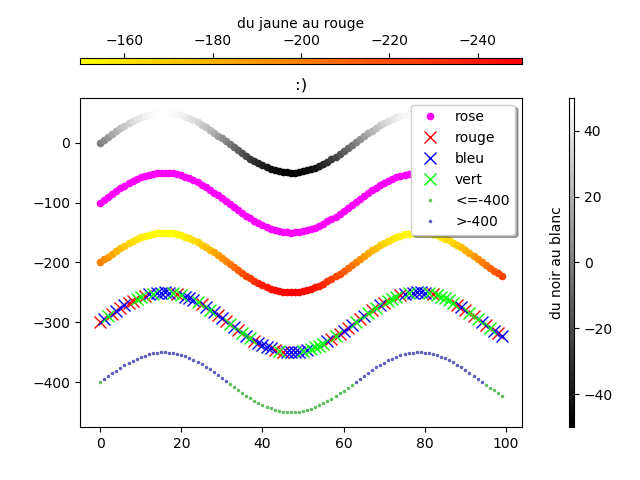

No handles with labels found to put in legend.
No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


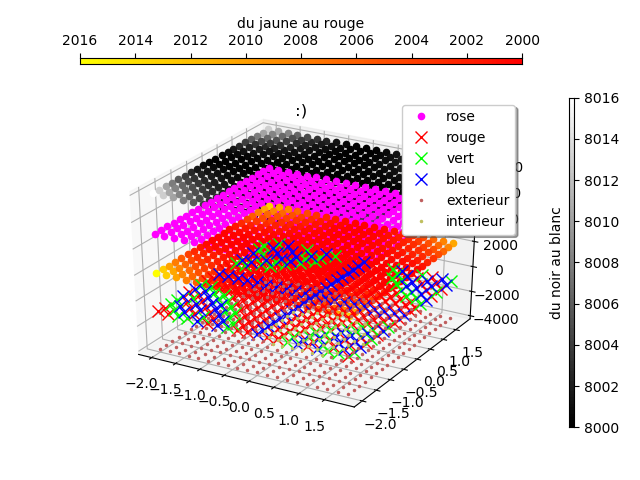

No handles with labels found to put in legend.
No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


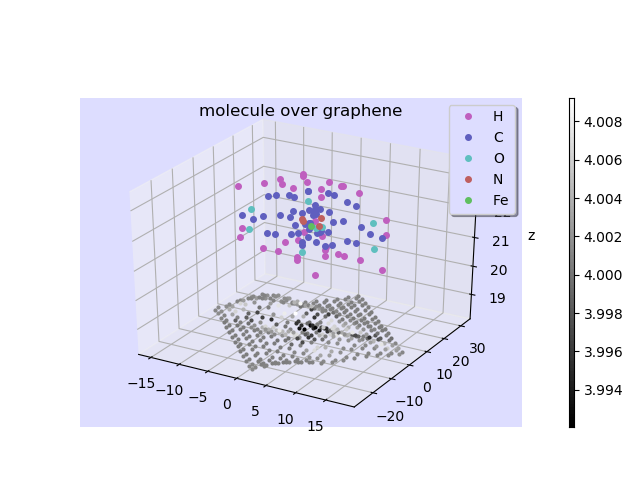

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


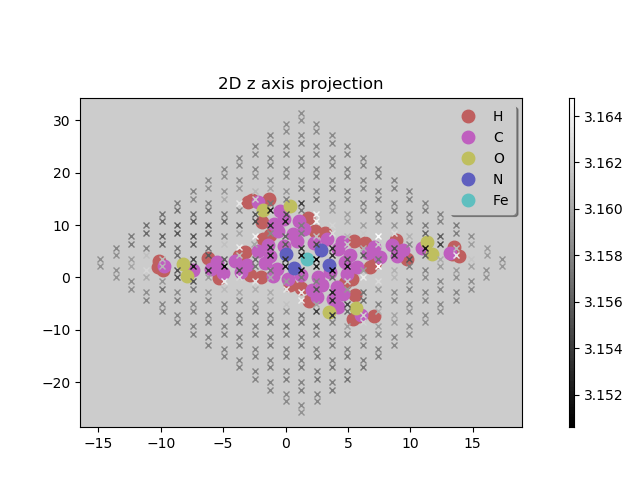

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


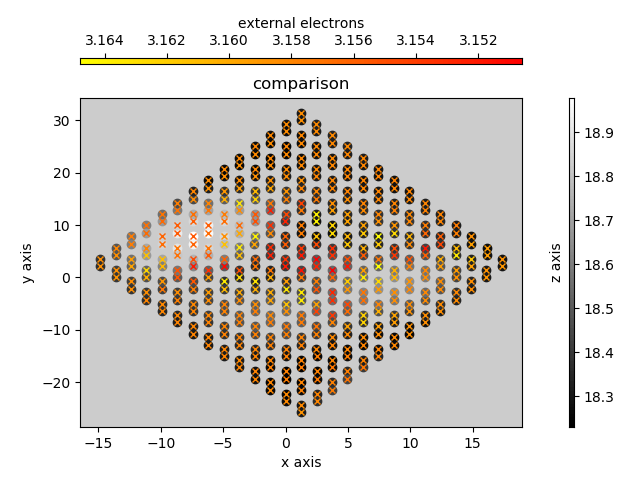

No handles with labels found to put in legend.
No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


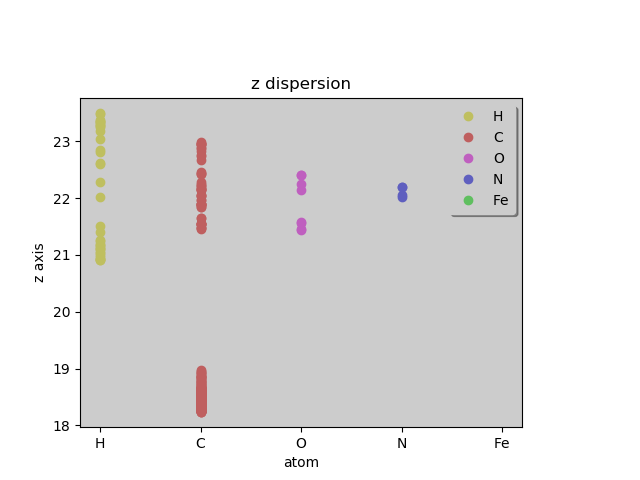

In [25]:
scm.run_example()